In [7]:
#import libraries
%pip install numpy
import pandas as pd
import seaborn as sns
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt 


#import csv file from link

url = "https://raw.githubusercontent.com/ngocha2811/world_happiness_report_dataset/refs/heads/main/data/clean/happiness_weather_data"

df = pd.read_csv(url)

Note: you may need to restart the kernel to use updated packages.


/var/folders/z1/hpkmqfl54717zbjq651n7__40000gn/T/ipykernel_93636/517491940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset='monthly_sun_hours',inplace=True)


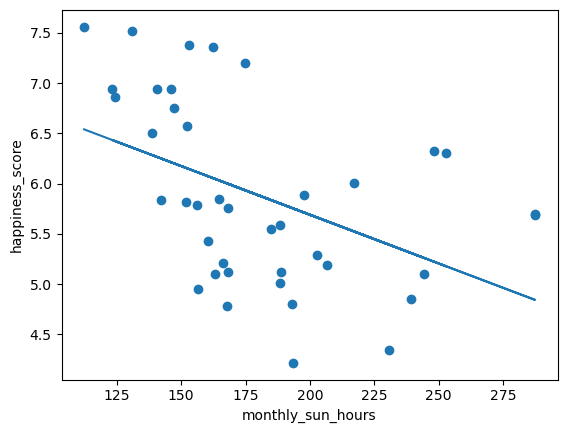

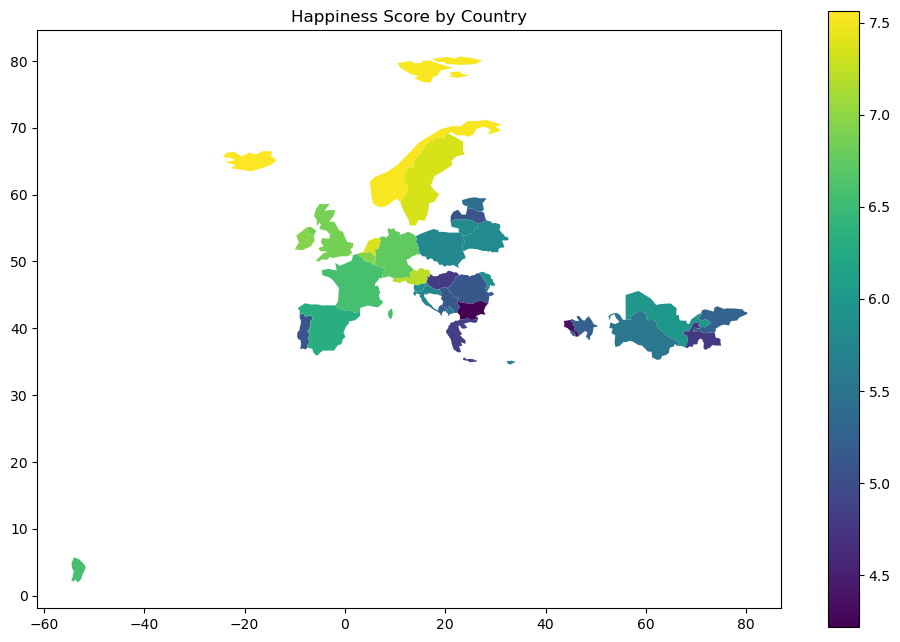

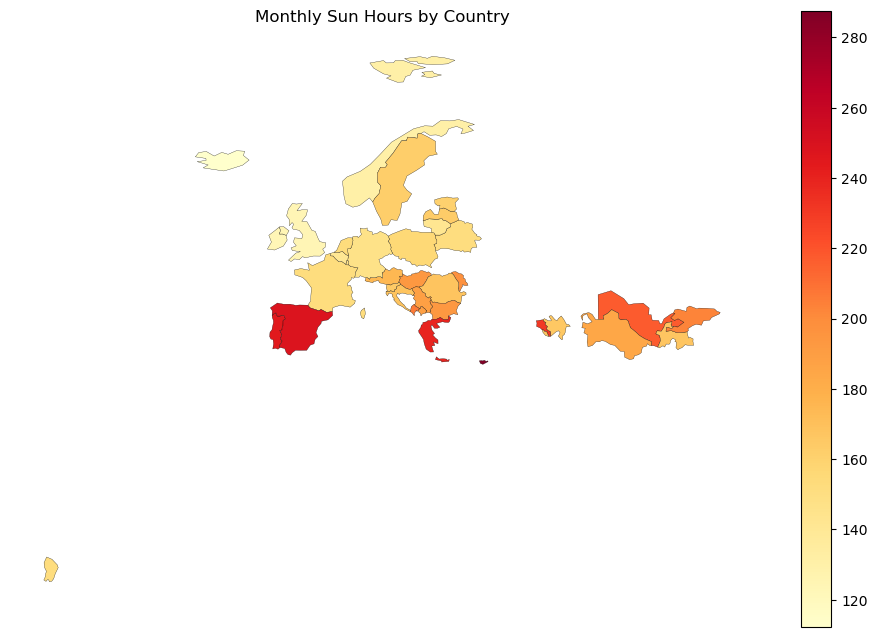

In [ ]:
#HYPOTHESIS 1
df1 = df[['monthly_sun_hours', 'country','happiness_rank','happiness_score','economy_(gdp_per_capita)','daily_temp','monthly_rain']]
df1.dropna(subset='monthly_sun_hours',inplace=True)
df1.plot.scatter(x='monthly_sun_hours', y='happiness_score')
df1['monthly_sun_hours'].corr(df1['happiness_score'])

m, b = np.polyfit(df1['monthly_sun_hours'], df1['happiness_score'], 1)

plt.scatter(df1['monthly_sun_hours'], df1['happiness_score'])
plt.plot(df1['monthly_sun_hours'], m*df1['monthly_sun_hours'] + b)
plt.xlabel("monthly_sun_hours")
plt.ylabel("happiness_score")
plt.show()

world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

merged = world.merge(df1, left_on="NAME", right_on="country")

merged.plot(column="happiness_score",
            cmap="viridis",
            legend=True,
            figsize=(12,8))

plt.title("Happiness Score by Country")
plt.show()
merged.plot(column="monthly_sun_hours",
            cmap="YlOrRd",
            legend=True,
            figsize=(12,8),
            edgecolor="black",
            linewidth=0.2)

plt.title("Monthly Sun Hours by Country")
plt.axis("off")
plt.show()

In [12]:
r = df1['monthly_sun_hours'].corr(df1['happiness_score'])
print(f"Correlation between sun hours and happiness score is: {r}")

Correlation between sun hours and happiness score is: -0.4579292279318866


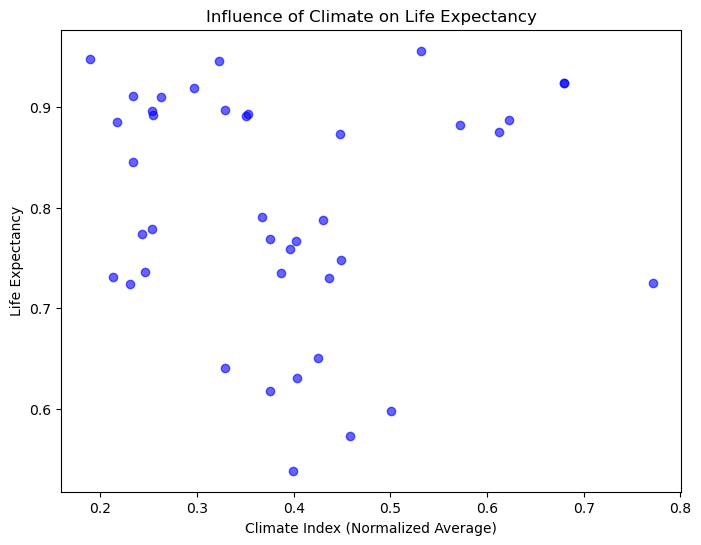

In [24]:
#HYPOTHESIS 2
from sklearn.preprocessing import MinMaxScaler

climate_vars = df[['monthly_sun_hours', 'daily_temp', 'monthly_rain']]

scaler = MinMaxScaler()
climate_scaled = scaler.fit_transform(climate_vars)

df['climate_index'] = climate_scaled.mean(axis=1)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['climate_index'], df['health_(life_expectancy)'], color='blue', alpha=0.6)
plt.xlabel('Climate Index (Normalized Average)')
plt.ylabel('Life Expectancy')
plt.title('Influence of Climate on Life Expectancy')
plt.show()

<Axes: >

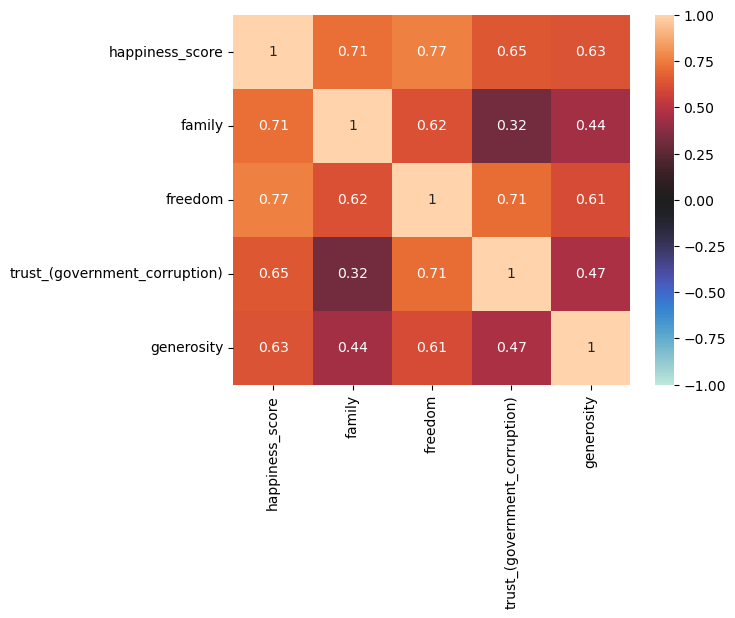

In [25]:
#HYPOTHESIS 3


#filter df to show only the strong positive correlations of the selected variables: happiness_score, family, freedom, trust

df_strong = df[["happiness_score", "family", "freedom", "trust_(government_corruption)", "generosity"]]

# Calculate the correlation matrix for the strong corr variables
strong_corr = df_strong.corr(numeric_only=bool)
strong_corr

# Plot the heatmap with a green colormap
sns.heatmap(strong_corr, annot=True, vmin=-1, vmax=1, center=0)



In [26]:
"""H4: GDP vs Generosity (does wealth increase generosity?)"""

import pandas as pd


url = "https://raw.githubusercontent.com/ngocha2811/world_happiness_report_dataset/refs/heads/main/data/clean/happiness_weather_data"

df = pd.read_csv(url)
df
df_analysis = df[["country", "economy_(gdp_per_capita)", "generosity"]].copy()

df_analysis["economy_(gdp_per_capita)"] = pd.to_numeric(
    df_analysis["economy_(gdp_per_capita)"], errors="coerce"
)
df_analysis["generosity"] = pd.to_numeric(
    df_analysis["generosity"], errors="coerce"
)

df_analysis = df_analysis.dropna()

df.sort_values("generosity", ascending = False)


,country,region,happiness_rank,happiness_score,standard_error,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual,year,monthly_sun_hours,daily_temp,monthly_rain
11,United Kingdom,Western Europe,21.0,6.867,0.01866,1.26637,1.28548,0.90943,0.59625,0.32067,0.51912,1.96994,2015,124.166667,12.458333,48.083333
16,Malta,Western Europe,37.0,6.302,0.04206,1.20740,1.30203,0.88721,0.60365,0.13586,0.51752,1.64880,2015,253.000000,19.858333,34.187500
5,Netherlands,Western Europe,7.0,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015,152.916667,10.916667,70.583333
9,Ireland,Western Europe,18.0,6.940,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570,2015,123.250000,9.454167,66.500000
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,112.250000,5.270833,81.625000
6,Sweden,Western Europe,8.0,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015,162.458333,7.808333,47.041667
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,130.750000,6.825000,68.375000
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,9.975000,58.416667
7,Austria,Western Europe,13.0,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320,2015,174.972222,11.861111,49.388889
29,Cyprus,Western Europe,67.0,5.689,0.05580,1.20813,0.89318,0.92356,0.40672,0.06146,0.30638,1.88931,2015,287.500000,20.404167,27.375000


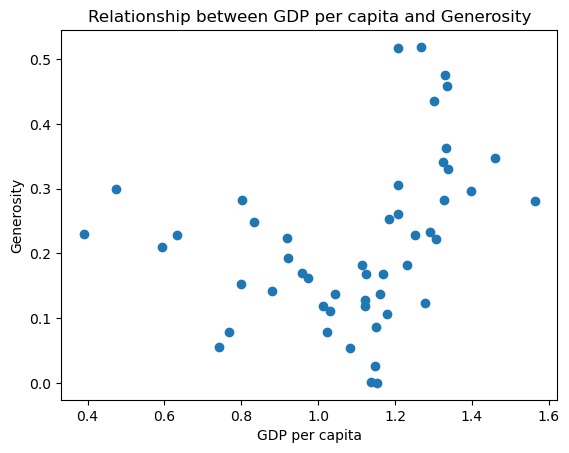

In [27]:
"""boxplot GDP to Generosity"""
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(
    df_analysis["economy_(gdp_per_capita)"],
    df_analysis["generosity"]
)
plt.xlabel("GDP per capita")
plt.ylabel("Generosity")
plt.title("Relationship between GDP per capita and Generosity")
plt.show()

In [28]:
"""P de Pearson"""
correlation = df['economy_(gdp_per_capita)'].corr(
    df["generosity"]
)

print(correlation.round(2))

"""weak to moderate relation"""

0.31


'weak to moderate relation'

In [29]:
"""divisão high gdp e low gdp"""

median_gdp = df_analysis["economy_(gdp_per_capita)"].median()

df_analysis["gdp_group"] = df_analysis["economy_(gdp_per_capita)"].apply(
    lambda x: "High GDP" if x >= median_gdp else "Low GDP"
)



print(df_analysis.groupby("gdp_group")["generosity"].mean().round(2))

gdp_group
High GDP    0.28
Low GDP     0.15
Name: generosity, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_7212\3510849186.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


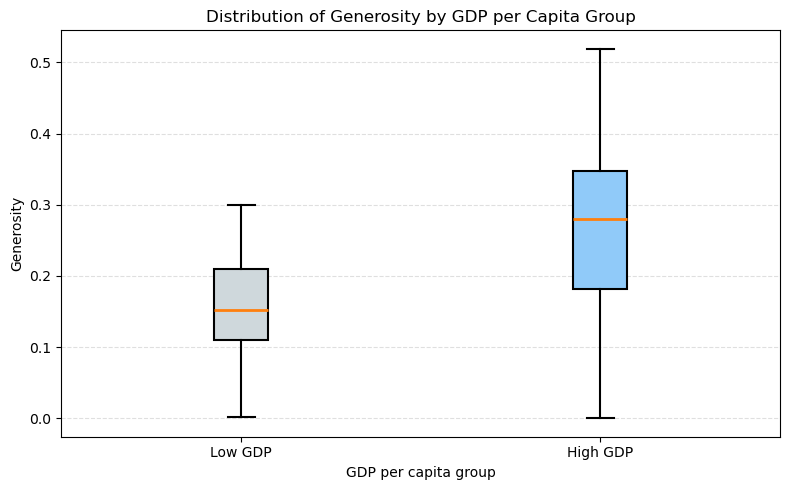

In [30]:
"""boxplot high gdp vs low gdp"""
plt.figure(figsize=(8, 5))

box = plt.boxplot(
    [
        df_analysis[df_analysis["gdp_group"] == "Low GDP"]["generosity"],
        df_analysis[df_analysis["gdp_group"] == "High GDP"]["generosity"]
    ],
    labels=["Low GDP", "High GDP"],
    patch_artist=True,
    showfliers=True,
    medianprops=dict(linewidth=2),
    boxprops=dict(linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5)
)

# cores suaves e académicas
colors = ["#cfd8dc", "#90caf9"]
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

plt.xlabel("GDP per capita group")
plt.ylabel("Generosity")
plt.title("Distribution of Generosity by GDP per Capita Group")

plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

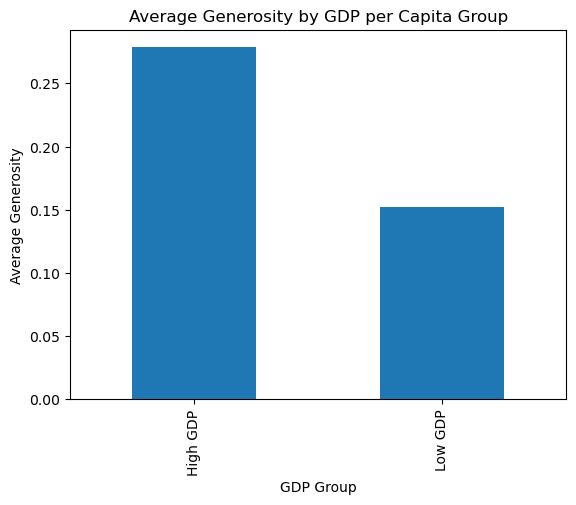

In [31]:
"""bar graph high vs low gdp"""
mean_values = df_analysis.groupby("gdp_group")["generosity"].mean()

plt.figure()
mean_values.plot(kind="bar")
plt.xlabel("GDP Group")
plt.ylabel("Average Generosity")
plt.title("Average Generosity by GDP per Capita Group")
plt.show()

In [32]:
high_gdp = df_analysis[df_analysis["gdp_group"] == "High GDP"]
low_gdp  = df_analysis[df_analysis["gdp_group"] == "Low GDP"]


corr_high = high_gdp["economy_(gdp_per_capita)"].corr(high_gdp["generosity"])
corr_low  = low_gdp["economy_(gdp_per_capita)"].corr(low_gdp["generosity"])

corr_high.round(2), corr_low.round(2)


(np.float64(0.43), np.float64(-0.6))

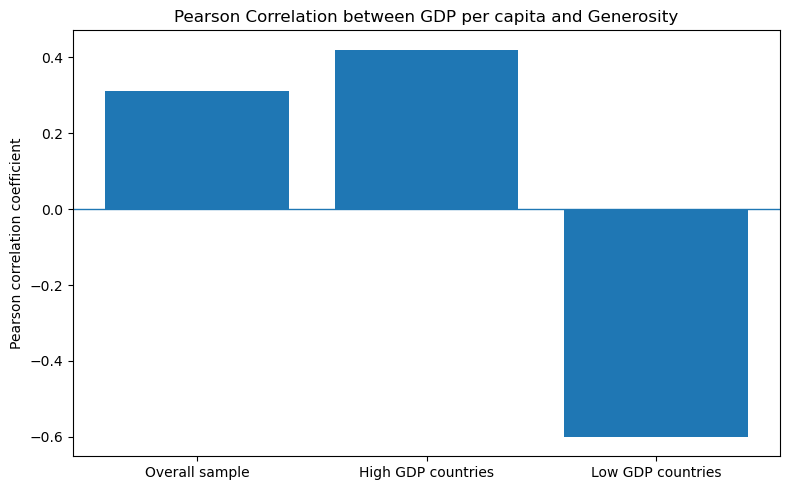

In [33]:
groups = [
    "Overall sample",
    "High GDP countries",
    "Low GDP countries"
]

pearson_values = [0.31, 0.42, -0.60]

plt.figure(figsize=(8, 5))

plt.bar(groups, pearson_values)
plt.axhline(0, linewidth=1)  # linha de referência no zero

plt.ylabel("Pearson correlation coefficient")
plt.title("Pearson Correlation between GDP per capita and Generosity")

plt.tight_layout()
plt.show()

In [34]:
"""Conclusion"""
# GDP does not have a strong relation to Generosity, however rich contries tend to be more generous than poor countries in Europe
#Pearson's 0.31 to the overall sample
#Pearson's 0.42 within the high GDP countries - Rich is more generous, but doesnt mean rich causes more generous
#Pearson's -0.60 within the low GDP countries - As GDP increases generousity decreases

'Conclusion'